# Measuring Performance with OpenCV
de https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_core/py_optimization/py_optimization.html

In [2]:
#init modules
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt

#set basic vars
baseDir=os.path.join('..','..','ExamplesRepo')
#file name
baseFileNameList=('cameraman.tif', 'eight.tif', 'circuit.tif')

In [3]:
#store the images in a dictionary
#using a comprehension solution 
imgDict={name: None for name in baseFileNameList}
for name in baseFileNameList:
    fileName=os.path.join(baseDir, name)
    imgDict[name] = cv2.imread(fileName,cv2.IMREAD_GRAYSCALE)   

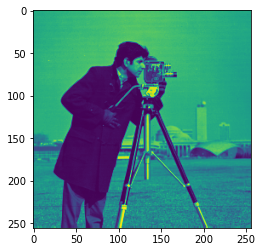

In [4]:
#use the dict as a switch-case
name='cameraman.tif'
img=imgDict[name]
plt.imshow(img)

In [4]:
#tick median blurr
e1 = cv2.getTickCount()
# de 5 a 49 en pasos de 2
for i in range(5,49,2):
    img1 = cv2.medianBlur(img,i)
e2 = cv2.getTickCount()
t = (e2 - e1)/cv2.getTickFrequency()
print("el tiempo total de procesado es de %f s" % (t))

el tiempo total de procesado es de 0.047102 s


## Default Optimization in OpenCV

In [5]:
# check if optimization is enabled
# Disable it
cv2.setUseOptimized(True)
cv2.useOptimized()


True

In [6]:
%timeit res = cv2.medianBlur(img,49)

2.09 ms ± 17.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
# Disable it
cv2.setUseOptimized(False)

In [8]:
cv2.useOptimized()

False

In [9]:
 %timeit res = cv2.medianBlur(img,49)

2.1 ms ± 20.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Performance Optimization Techniques


1. Avoid using loops in Python as far as possible, especially double/triple loops etc. They are inherently slow.
2. Vectorize the algorithm/code to the maximum possible extent because Numpy and OpenCV are optimized for vector operations.
3. Exploit the cache coherence.
4. Never make copies of array unless it is needed. Try to use views instead. Array copying is a costly operation.

Even after doing all these operations, if your code is still slow, or use of large loops are inevitable, use additional libraries like Cython to make it faster.